In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\darre\OneDrive - Nanyang Technological University\NTU\Y1S2 - Jan 2025\SC1015 Intro to Data Science & AI\Mini_Project\SC1015\poggers.csv')

## 1️⃣ No. of students per university

📊 **Barchart**

### 🏆 Goal: To see variations in no. of students per university.

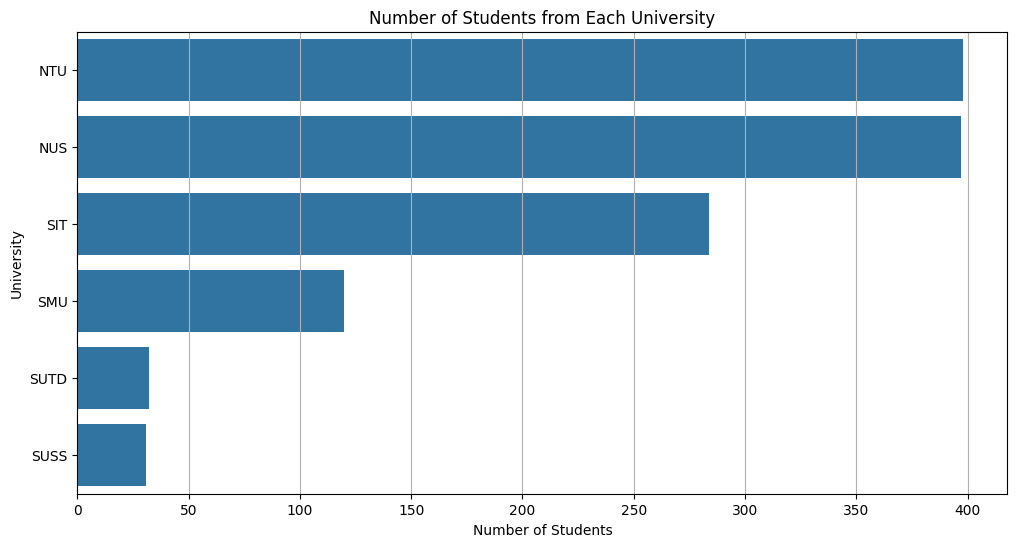

In [3]:
# Plot the bar chart for the number of students from each university
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='university', order=df['university'].value_counts().index)
plt.title('Number of Students from Each University')
plt.xlabel('Number of Students')
plt.ylabel('University')
plt.grid(axis='x')
plt.show()


- We see that majority of students in the survey consist of NUS,NTU and SIT students. There are some SMU students, but very little SUTD and SUSS students.

## 2️⃣ Employment rate and salary comparison among universities

📈 **Lineplot**

### 🏆 Goal: A time series to compare both the employment rates and salary for each field of study among the universities.

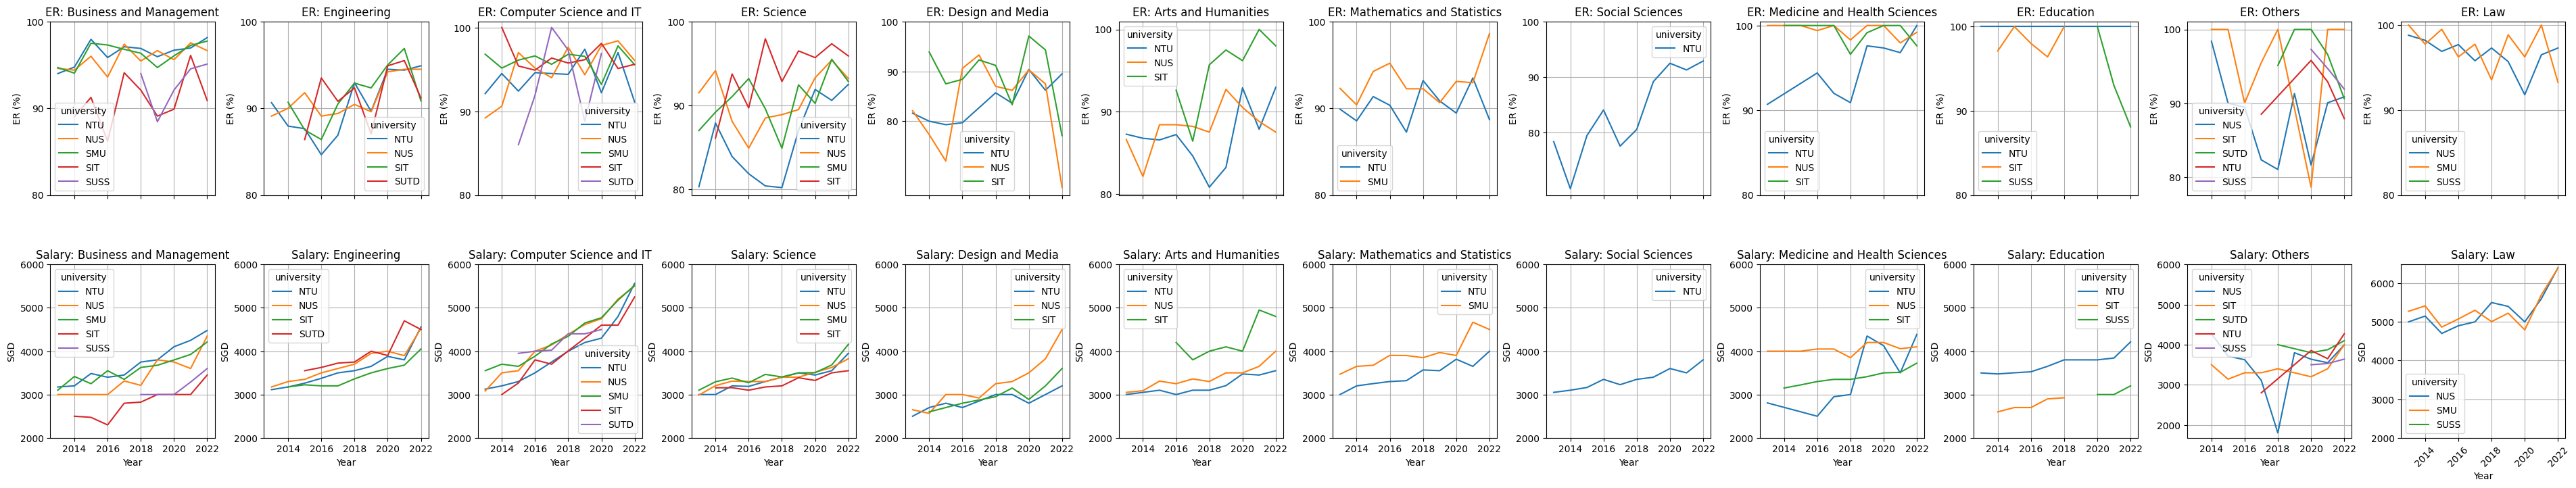

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for aggregation 
numeric_cols = df.select_dtypes(include='number').columns 

# Group by 'year', 'field_of_study', and 'university' and calculate the median for numeric columns 
df_grouped = df.groupby(['year', 'field_of_study', 'university'], as_index=False)[numeric_cols].median().reset_index()

# Calculate the number of unique fields of study
num_fields = len(df_grouped['field_of_study'].unique())

# Define figure size for better aspect ratio
fig, axes = plt.subplots(nrows=2, ncols=num_fields, figsize=(num_fields * 4, 8), sharex=True)

# Consistent y-axis limits and ticks
y_ticks_salary = [2000, 3000, 4000, 5000, 6000]
y_ticks_employment = [80, 90, 100]

# Plot time series for each field of study
for i, field in enumerate(df['field_of_study'].unique()):
    field_df = df_grouped[df_grouped['field_of_study'] == field]

    # Employment Rate subplot (top row)
    sns.lineplot(data=field_df, x='year', y='employment_rate_overall', hue='university', ax=axes[0, i])
    axes[0, i].set_title(f'ER: {field}', fontsize=12)
    axes[0, i].set_xlabel('')
    axes[0, i].set_ylabel('ER (%)')
    axes[0, i].set_yticks(y_ticks_employment)
    axes[0, i].grid(True)

    # Gross Monthly Median Salary subplot (bottom row)
    sns.lineplot(data=field_df, x='year', y='gross_monthly_median', hue='university', ax=axes[1, i])
    axes[1, i].set_title(f'Salary: {field}', fontsize=12)
    axes[1, i].set_xlabel('Year')
    axes[1, i].set_ylabel('SGD')
    axes[1, i].set_yticks(y_ticks_salary)
    axes[1, i].grid(True)

# Adjust layout for better spacing
plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Adjust spacing between subplots
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


- Salary-wise, majority of fields show an upward trend over the years.
- Employment rates-wise, things are more erratic, with constant ups and downs over the years, with the exception of specific NTU and SIT field related courses and NUS's Computer Science and IT.

## 3️⃣ Salary Distribution Across Fields of Study

🎚️ **Boxplot**

### 🏆 Goal: Show salary variation across fields of study.

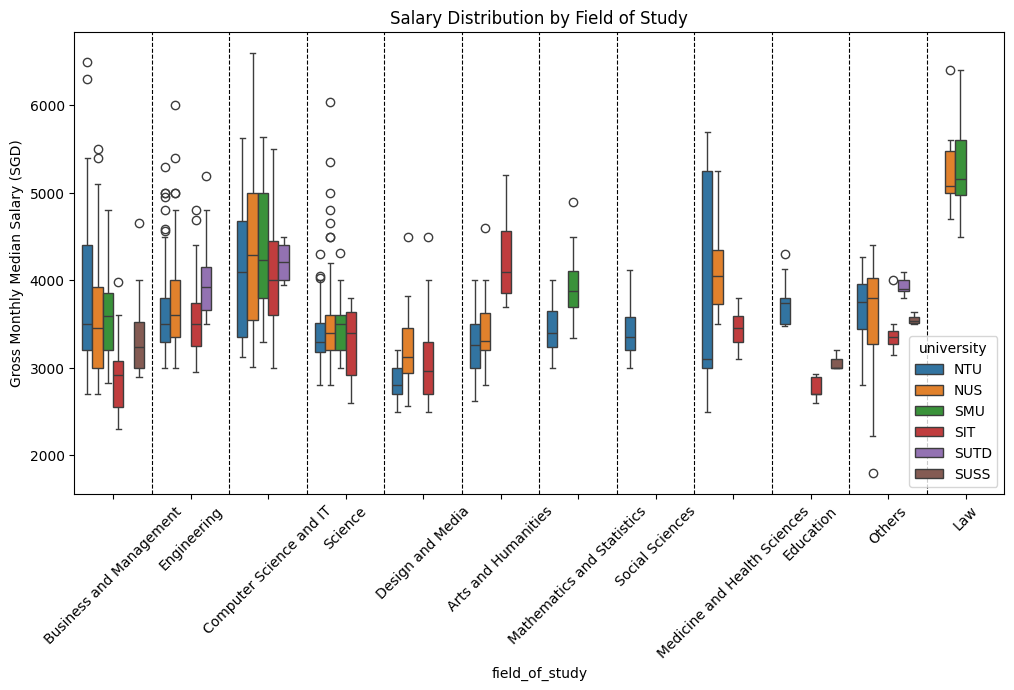

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="field_of_study", y="gross_monthly_median", hue="university")
plt.xticks(rotation=45)
plt.title("Salary Distribution by Field of Study")
plt.ylabel("Gross Monthly Median Salary (SGD)")
for i in range(len(df["field_of_study"].unique()) - 1):
    plt.axvline(i + 0.5, color='black', linestyle='--', linewidth=0.8)  # Add separator lines
plt.show()

- We can see that Law, Business and Management, Engineering, Comuter Science and IT, and Medicine and Health Sciences fields tend to pay better compared to the rest.
- If we examine closely, we can see the differences in pay among the universities. For instance, SIT's Arts and Humanties field tend to pay better compared to NUS and NTU, but it is the opposite for Business and Management, as well as Medicine and Health Sciences fields.

## 4️⃣ University Ranking by Salary

📊 Bar Chart (Top Universities by Median Salary per Year)

### 🏆 Goal: Show which universities consistently offer the highest salaries.

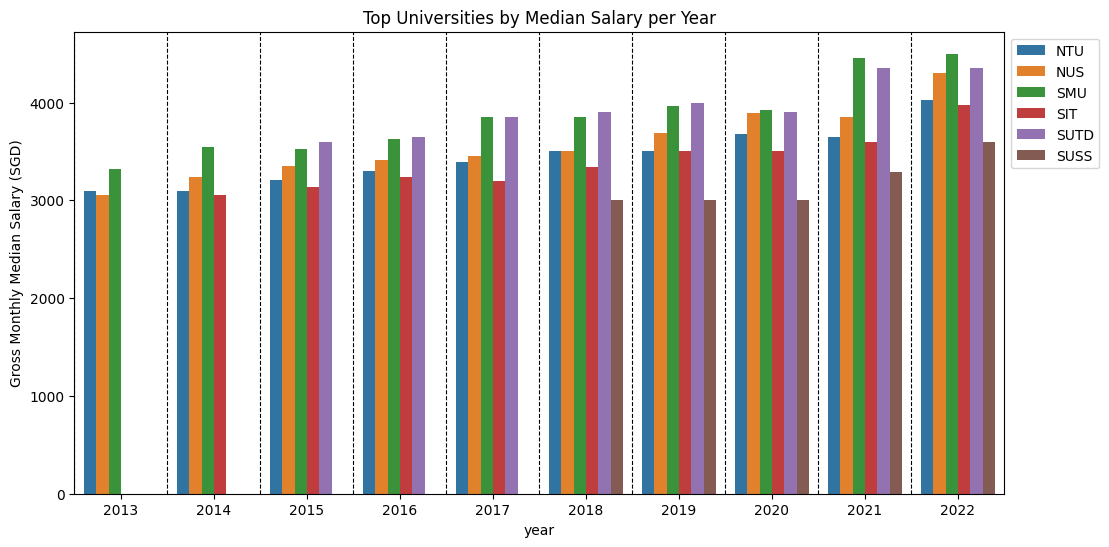

In [6]:
# Group by year and university and calculate the median gross monthly salary
df_grouped_year = df.groupby(["year", "university"])["gross_monthly_median"].median().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_grouped_year, x="year", y="gross_monthly_median", hue="university")
plt.title("Top Universities by Median Salary per Year")
plt.ylabel("Gross Monthly Median Salary (SGD)")

# Adding line separators
for year in df_grouped_year["year"].unique():
    ax.axvline(x=year - df_grouped_year["year"].min() - 0.5, color='black', linestyle='--', linewidth=0.8)

# Shift the legend outside the plot area
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

- Pushing fields aside, we can see that graduates from SMU and SUTD consistenly pay the highest over the years. SUSS graduates seem to have the lowest pay.
- Overall though, year on year salaries are increasing.

## 5️⃣ Salary Comparison by Honors Classification

🎚️ Boxplot

### 🏆 Goal: This will help determine if certain honors classifications correlate with higher salaries.

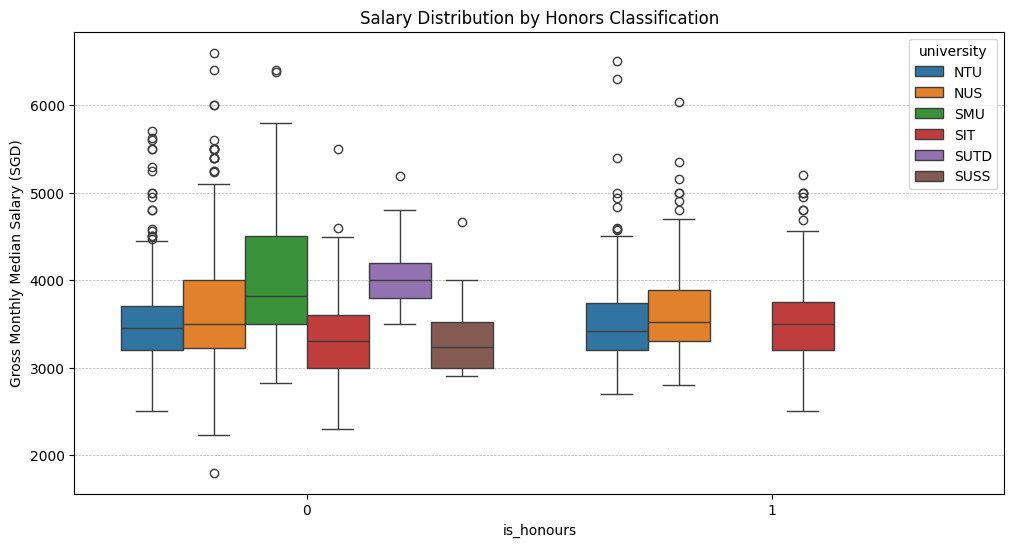

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="is_honours", y="gross_monthly_median", hue="university")
plt.title("Salary Distribution by Honors Classification")
plt.ylabel("Gross Monthly Median Salary (SGD)")
plt.grid(axis="y", linestyle="--", linewidth=0.5)  # Horizontal grid lines for clarity
plt.show()

- Having an honours, does not seem to affect salary.

## 6️⃣ Employment Rate by Honors Classification

📊 Bar chart to show how employment rates vary by honors

### 🏆 Goal: Reveal whether graduates with certain honors have a better chance of securing jobs.

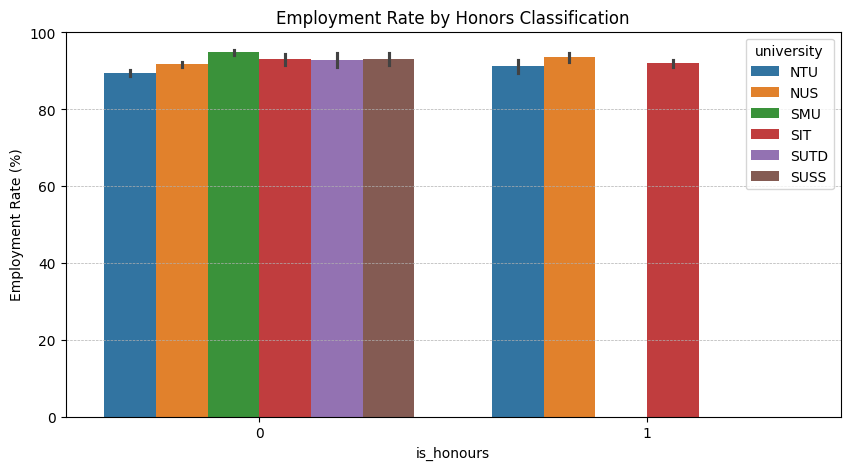

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="is_honours", y="employment_rate_overall", hue="university")
plt.title("Employment Rate by Honors Classification")
plt.ylabel("Employment Rate (%)")
plt.grid(axis="y", linestyle="--", linewidth=0.5)  # Add horizontal grid
plt.show()

- A similar story for employment rates. Furthermore, not all universities offer honours.

## 7️⃣ Employment Rate vs Salary (Correlation Analysis)
📉 Scatter Plot with Regression Line

While salary and employment rate both seem to be response variables, could a degree with higher employment rate also mean a higher salary? Afterall, one would assume a highly sought after job also means a higher pay.

### 🏆 Goal: Examine if higher salaries correlate with higher employment rates.


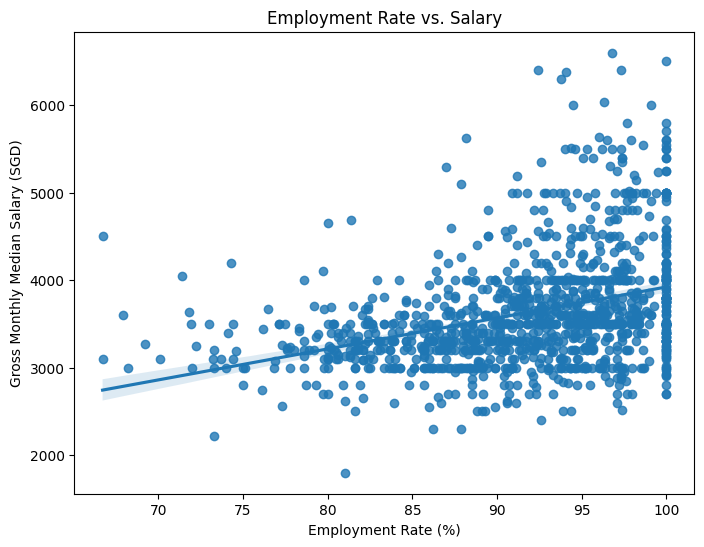

In [9]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x="employment_rate_overall", y="gross_monthly_median")
plt.title("Employment Rate vs. Salary")
plt.xlabel("Employment Rate (%)")
plt.ylabel("Gross Monthly Median Salary (SGD)")
plt.show()


In [10]:
# Compute correlation
correlation = df["gross_monthly_median"].corr(df["employment_rate_overall"])
print(f"Correlation between Gross Monthly Median Salary and Employment Rate: {correlation:.4f}")

Correlation between Gross Monthly Median Salary and Employment Rate: 0.3507


- We note an interesting small postive correlation, nothing too drastic. 
- Perhaps we can explore more if it is a specific field or university that is contributing to this this positive correlation.

In [11]:
# Compute correlation for each university
corr_by_uni = df.groupby("university")[["gross_monthly_median", "employment_rate_overall"]].corr().unstack().iloc[:,1]

# Display sorted correlations
print("Correlation by University:")
print(corr_by_uni.sort_values(ascending=False))

Correlation by University:
university
NUS     0.396526
NTU     0.394998
SMU     0.384160
SIT     0.223884
SUTD    0.181331
SUSS    0.026993
Name: (gross_monthly_median, employment_rate_overall), dtype: float64


In [12]:
# Compute correlation for each field of study
corr_by_field = df.groupby("field_of_study")[["gross_monthly_median", "employment_rate_overall"]].corr().unstack().iloc[:,1]

# Display sorted correlations
print("\nCorrelation by Field of Study:")
print(corr_by_field.sort_values(ascending=False))


Correlation by Field of Study:
field_of_study
Social Sciences                 0.671708
Others                          0.566559
Mathematics and Statistics      0.542013
Arts and Humanities             0.540941
Education                       0.403993
Medicine and Health Sciences    0.397656
Business and Management         0.355343
Engineering                     0.282768
Computer Science and IT         0.280655
Science                         0.264601
Design and Media               -0.070713
Law                            -0.075854
Name: (gross_monthly_median, employment_rate_overall), dtype: float64


- From the correlation figures we see that Social Sciences, Others, Mathematics and Statistics and Arts and Humanities related courses have a stronger positive correlation between employment rates and median gross salary.

<Figure size 1200x800 with 0 Axes>

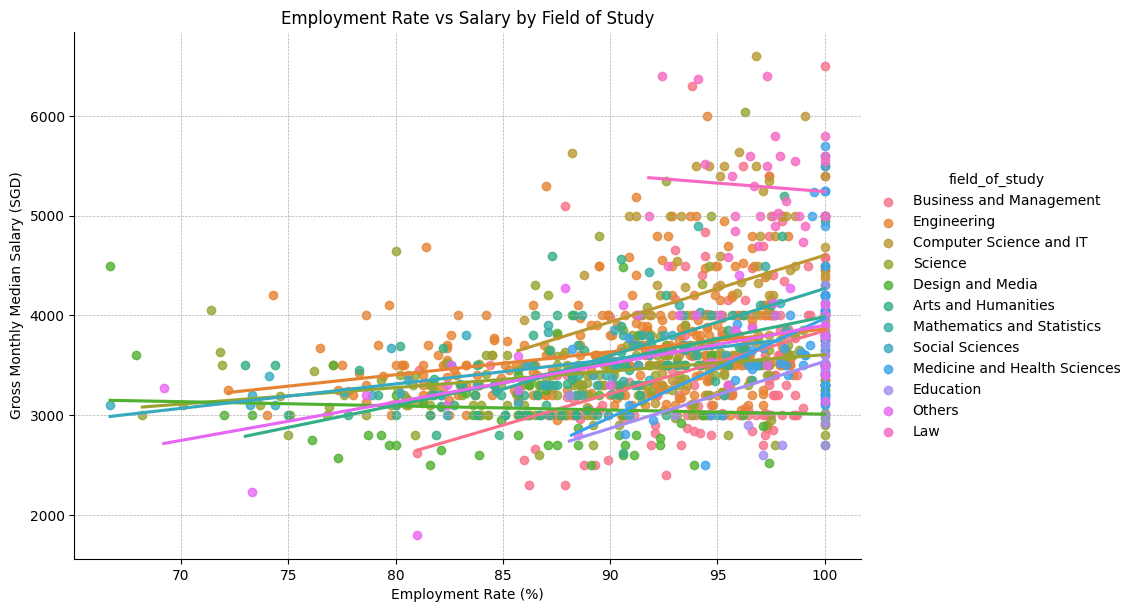

In [13]:
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x="employment_rate_overall", y="gross_monthly_median", hue="field_of_study", aspect=1.5, ci=None, height=6)
plt.title("Employment Rate vs Salary by Field of Study")
plt.xlabel("Employment Rate (%)")
plt.ylabel("Gross Monthly Median Salary (SGD)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()

# 🖳 Simple Linear Regression with Preprocessing  

## **🔹 Overview**  
We train a **Linear Regression model** to predict **gross monthly median salary** based on university, degree, field of study, and employment rates.  

## **🔧 We need to use a pipeline**  
A **Pipeline** ensures smooth data preprocessing before training the model:  
- **SimpleImputer**: Handles missing values in numerical features by filling them with the median.  
- **OneHotEncoder**: Converts categorical features (university, degree, field of study) into numeric format for the model.  

## **🚀 Steps in the Code**  
1️⃣ **Preprocess data** (impute missing values + encode categorical features).  
2️⃣ **Train-test split** to evaluate generalization.  
3️⃣ **Fit a Linear Regression model** using the pipeline.  
4️⃣ **Make predictions & evaluate performance** using Mean Absolute Error (MAE) & R² Score.  

## **📈 Why This Approach?**  
✅ Automates preprocessing → **less manual work**.  
✅ Ensures proper handling of missing values & categorical features.  
✅ Improves reproducibility and **avoids data leakage**.  



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Target variable
target = "gross_monthly_median"

# Features
categorical_features = ["university", "degree_cleaned", "field_of_study"]
numerical_features = ["employment_rate_overall", "employment_rate_ft_perm", "is_honours", "year"]

# Drop rows where target is missing
df = df.dropna(subset=[target])

# Define preprocessing (Handle missing values + One-Hot Encoding)
numerical_transformer = SimpleImputer(strategy="median")
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

full_transformer = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define Linear Regression model pipeline
linear_pipeline = Pipeline([
    ("preprocessor", full_transformer),
    ("model", LinearRegression())
])

# Train-test split
X = df[numerical_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["year"])

# Train the model
linear_pipeline.fit(X_train, y_train)

# Predictions
y_pred = linear_pipeline.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - Mean Absolute Error: {mae:.2f}")
print(f"Linear Regression - R² Score: {r2:.2f}")

Mean Absolute Error: 242.69
R² Score: 0.76



## GridSearchCV

- Exploring other models that possibly could be better than Random Forest.  
- Different models or better hyperparameters could improve performance.  

### We use GridSearchCV, which has the following benefits:
- **Automates hyperparameter tuning** by testing multiple settings.  
- **Performs cross-validation** to ensure results are reliable.  
- **Finds the best model** by comparing performance across different configurations.  

### Key Benefits
✅ Avoids **manual trial-and-error** tuning.  
✅ Helps prevent **overfitting** by using validation data.  
✅ Improves **model accuracy & generalization**.  

## Process
- Use `GridSearchCV` to test the following models: `SVR`,`ElasticNet`,`DecisionTree`,`GradientBoosting`.  
- Tune `max_depth`, `n_estimators`, and `learning_rate`.  
- Compare results and select the best-performing model.  


In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Target variable
target = "gross_monthly_median"

# Features
categorical_features = ["university", "degree_cleaned", "field_of_study"]
numerical_features = ["employment_rate_overall", "employment_rate_ft_perm", "is_honours", "year"]

# Drop rows where target is missing
df = df.dropna(subset=[target])

# --- Handle Repeats ---
# For option 2, we lose year-by-year trends but we can get more overall trends.
# Option 1: Use all rows (if we assume salary trends shift each year)
# Option 2: Aggregate salaries by field_of_study & university (Uncomment below)
# df = df.groupby(["university", "degree_cleaned", "field_of_study"]).agg({
#     "gross_monthly_median": "mean",
#     "employment_rate_overall": "mean",
#     "employment_rate_ft_perm": "mean",
#     "is_honours": "first",
#     "year": "max"  # Take the latest year (or use mean if needed)
# }).reset_index()

# Define preprocessing (Handle missing values + One-Hot Encoding)
numerical_transformer = SimpleImputer(strategy="median")
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

full_transformer = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Define pipelines for different models
pipelines = {
    "ElasticNet": Pipeline([("preprocessor", full_transformer), ("model", ElasticNet())]),
    "DecisionTree": Pipeline([("preprocessor", full_transformer), ("model", DecisionTreeRegressor())]),
    "RandomForest": Pipeline([("preprocessor", full_transformer), ("model", RandomForestRegressor())]),
    "GradientBoosting": Pipeline([("preprocessor", full_transformer), ("model", GradientBoostingRegressor())]),
    "SVR": Pipeline([("preprocessor", full_transformer), ("model", SVR())]),
}

# Define hyperparameter grids
param_grids = {
    "ElasticNet": {"model__alpha": [0.1, 1.0], "model__l1_ratio": [0.1, 0.5]},
    "DecisionTree": {"model__max_depth": [None, 10], "model__min_samples_split": [2, 10]},
    "RandomForest": {"model__n_estimators": [100, 200], "model__max_depth": [None, 10]},
    "GradientBoosting": {"model__n_estimators": [100, 200], "model__learning_rate": [0.01, 0.1]},
    "SVR": {"model__C": [0.1, 1.0], "model__kernel": ["linear", "rbf"]},
}

# Train-test split (Ensure all years are represented)
X = df[numerical_features + categorical_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=df["year"])

# Fit and evaluate each model using GridSearchCV
results = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "R²": r2, "Best Params": grid_search.best_params_}

# Print results
for name, result in results.items():
    print(f"{name} Regression - MSE: {result['MSE']:.2f}, R²: {result['R²']:.2f}")
    print(f"Best Parameters: {result['Best Params']}\n")


Training ElasticNet...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training SVR...
ElasticNet Regression - MSE: 175004.98, R²: 0.60
Best Parameters: {'model__alpha': 0.1, 'model__l1_ratio': 0.5}

DecisionTree Regression - MSE: 228521.32, R²: 0.47
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 10}

RandomForest Regression - MSE: 105796.63, R²: 0.76
Best Parameters: {'model__max_depth': None, 'model__n_estimators': 100}

GradientBoosting Regression - MSE: 79087.76, R²: 0.82
Best Parameters: {'model__learning_rate': 0.1, 'model__n_estimators': 200}

SVR Regression - MSE: 264697.06, R²: 0.39
Best Parameters: {'model__C': 1.0, 'model__kernel': 'linear'}

